In [1]:
import pandas as pd
%matplotlib inline

In [2]:
dfclientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
dflojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
dfprodutos = pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
dfvendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')
dfPag = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')

# Análise Preliminar

In [3]:
dfclientes.sample(5)

,id,nome,sexo,dt_nasc
55,56,Rafael Santos,M,8/1/1948
759,760,André Oliveira,M,2/10/1979
526,527,Renan Cardoso,M,8/14/1977
313,314,Diogo Santos,M,5/1/1995
934,935,Lucas Almeida,M,2/14/1936


In [4]:
dfclientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

In [5]:
dfclientes[dfclientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [6]:
dfclientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [7]:
dfprodutos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


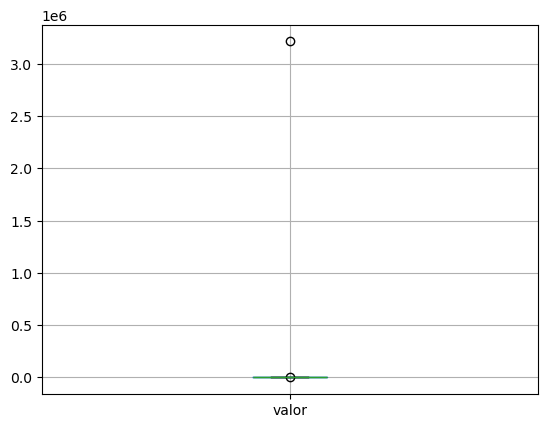

In [8]:
import matplotlib.pyplot as plt 
dfprodutos.boxplot(column=['valor'])
plt.show() 

In [9]:
dfprodutos[dfprodutos.valor>300000]

,id,produto,valor
9,10,xxx-231a,3211352.0


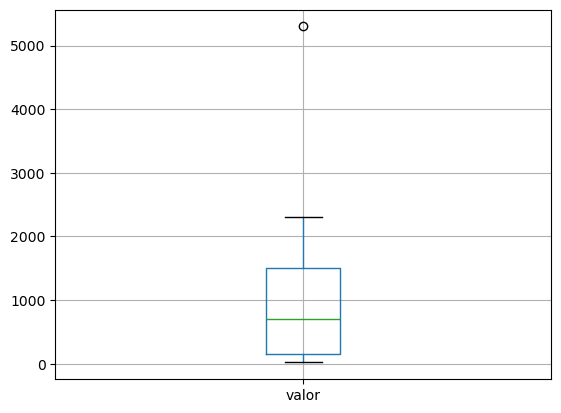

In [10]:
import matplotlib.pyplot as plt 
dfprodutos[dfprodutos.valor <3000000].boxplot(column=['valor'])
plt.show()

In [11]:
dfvendas[dfvendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64

In [12]:
dfvendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [13]:
dfPag

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15
...,...,...,...
2067,2068,2990,2020-10-04
2068,2069,2992,2020-10-10
2069,2070,2994,2020-10-09
2070,2071,2996,2020-10-17


# Data Cleanning

## Dados Nulos

In [14]:
dfclientes.loc[dfclientes.nome.isnull(),'nome'] = 'Sem Nome'
dfclientes.loc[dfclientes.sexo.isnull(),'sexo'] = 'O'
dfclientes.loc[dfclientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2025'


In [15]:
dfclientes.loc[[269,287], :]

,id,nome,sexo,dt_nasc
269,270,Sem Nome,M,1/1/2025
287,288,Victor Ribeiro,O,12/17/1974


In [16]:
dfclientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [17]:
dfPag.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

## Outliers

In [18]:
dfprodutos.loc[9,'valor'] = dfprodutos.valor[9]/10000
dfprodutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


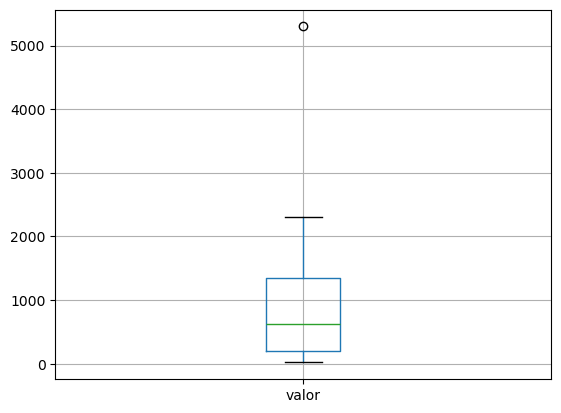

In [19]:
import matplotlib.pyplot as plt
dfprodutos.boxplot(column=['valor'])
plt.show()

## Dados Duplicados


In [20]:
dfclientes[dfclientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


In [21]:
dfclientes[dfclientes.nome=='Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [22]:
dfclientes.drop('id', axis=1).duplicated().sum()

np.int64(0)

In [23]:
dfprodutos.produto.duplicated().sum()

np.int64(0)

In [24]:
dflojas.cidade.duplicated().sum()

np.int64(0)

In [25]:
dfvendas[dfvendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


In [26]:
dfvendas[(dfvendas.id_cliente==559) & (dfvendas.id_loja==2) & (dfvendas.id_produto==5)]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


dfPag.drop('id', axis=1).duplicated().sum()

## Formato de dados

In [27]:
dfclientes.dt_nasc = pd.to_datetime(dfclientes.dt_nasc, format = '%m/%d/%Y')
dfclientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


In [28]:
dfprodutos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


## Indexes

In [29]:
dfclientes = dfclientes.set_index('id')
dfclientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


In [30]:
dfclientes.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
      dtype='int64', name='id', length=1000)

In [31]:
dflojas = dflojas.set_index('id')
dfprodutos = dfprodutos.set_index('id')
dfvendas = dfvendas.set_index('id')
dfPag= dfPag.set_index('id')


In [32]:
dfprodutos.index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64', name='id')

## Data Fusion

In [33]:
df = dfvendas.join(dfclientes.add_prefix('Cliente_'),on= 'id_cliente')
df = df.join(dflojas.add_prefix('loja_'),on= 'id_loja')
df = df.join(dfprodutos.add_prefix('produto_'),on= 'id_produto')

In [34]:
df

,id_cliente,id_loja,id_produto,dt_venda,Cliente_nome,Cliente_sexo,Cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [35]:
dfclientes.loc[393]

nome             Gustavo Silva
sexo                         M
dt_nasc    1950-01-04 00:00:00
Name: 393, dtype: object

In [36]:
dfPag

,id_venda,dt_pgto
id,,
1,1,2018-01-24
2,2,2018-02-17
3,3,2018-02-14
4,5,2018-01-23
5,7,2018-02-15
...,...,...
2068,2990,2020-10-04
2069,2992,2020-10-10
2070,2994,2020-10-09


In [37]:
df = df.join(dfPag.set_index('id_venda'))

In [38]:
df

,id_cliente,id_loja,id_produto,dt_venda,Cliente_nome,Cliente_sexo,Cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


df.isnull().sum() 

## Future Enginnering 

In [39]:
df['Pg'] = 1 
df.loc[df.dt_pgto.isnull(), 'Pg'] = 0
df

,id_cliente,id_loja,id_produto,dt_venda,Cliente_nome,Cliente_sexo,Cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,Pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


In [40]:
df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df

,id_cliente,id_loja,id_produto,dt_venda,Cliente_nome,Cliente_sexo,Cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,Pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


In [41]:
df['cliente_idade'] = ((pd.to_datetime('today') - df.Cliente_dt_nasc).dt.days / 365.25).astype(int)
df

,id_cliente,id_loja,id_produto,dt_venda,Cliente_nome,Cliente_sexo,Cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,Pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,75
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,53
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,63
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,83
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,25
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,31
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,39


# Análises de Vendas e Receitas


## Lojas e Produtos que mais Vendem

In [42]:
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending =False)
graf_dados

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

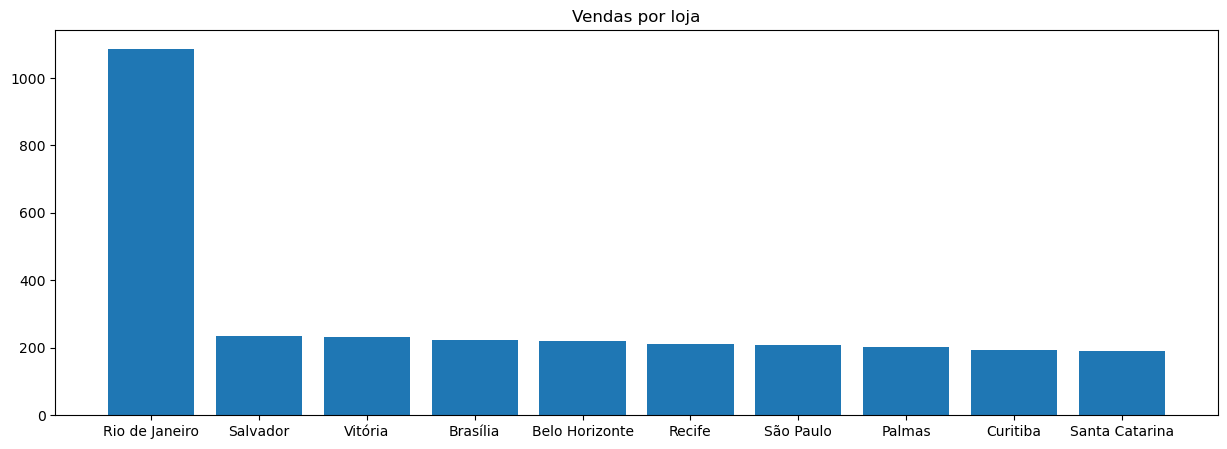

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Vendas por loja')
plt.show()

## Produto que mais vendem

In [44]:
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

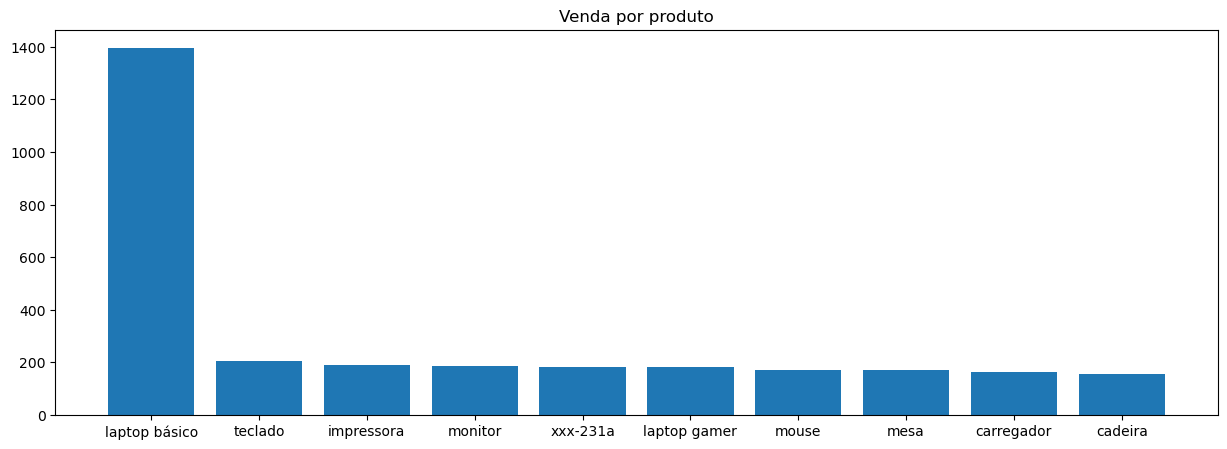

In [45]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Venda por produto')
plt.show()

## Receita por Loja

In [46]:
graf_dados = df.groupby('loja_cidade')['produto_valor'].sum().sort_values(ascending=False)
graf_dados

loja_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

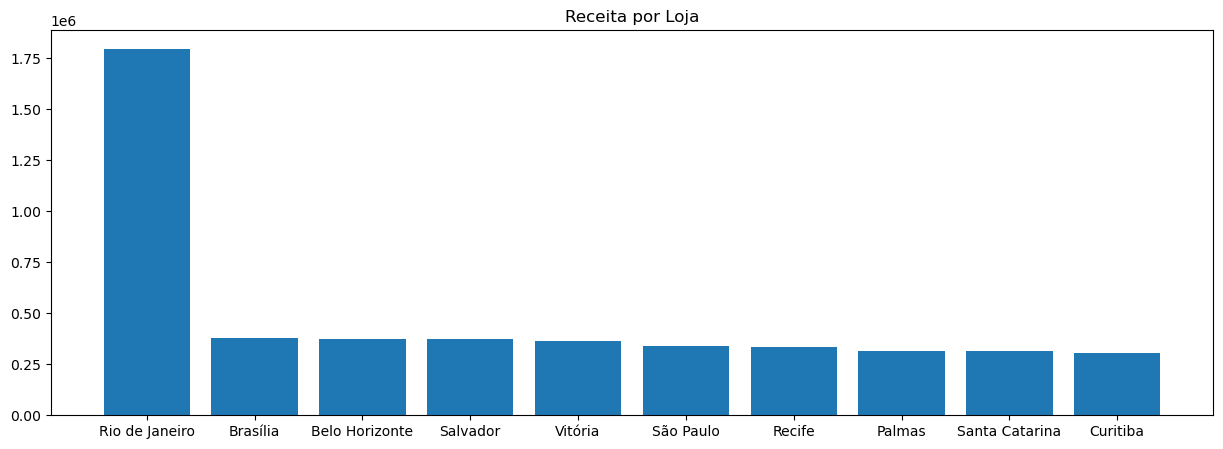

In [47]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Loja')
plt.show()

In [48]:
maior_valor = graf_dados.max()
media_demais = graf_dados[graf_dados != graf_dados.max()].mean()
proporcao = maior_valor / media_demais

print(f'O maior valor é {maior_valor}, sendo {proporcao:.2f} vezes a média dos demais, que é {media_demais:.0f}')

O maior valor é 1797906.9768, sendo 5.22 vezes a média dos demais, que é 344624


## Receita por Produto

In [49]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
graf_dados

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

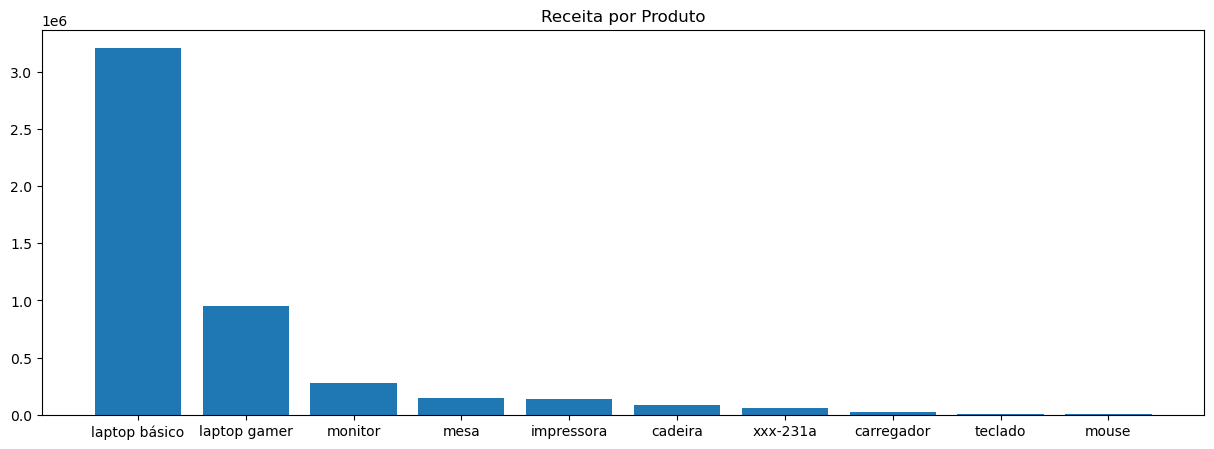

In [50]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.index, graf_dados.values)
plt.title('Receita por Produto')
plt.show()

## Subplots

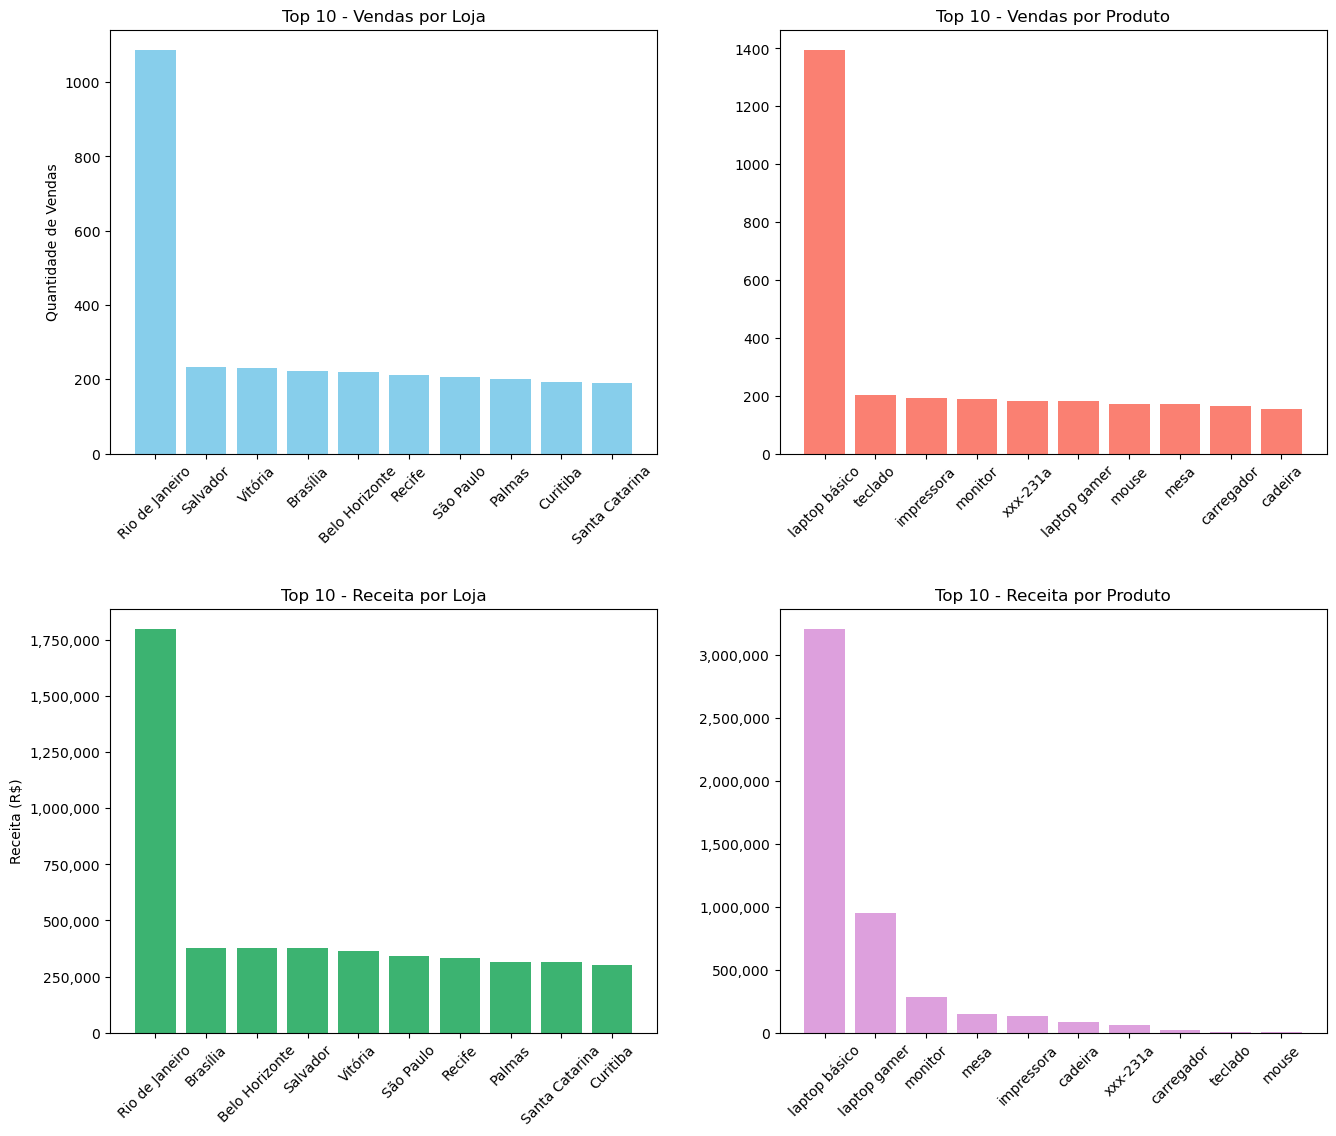

In [51]:
from matplotlib.ticker import FuncFormatter
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

ax1 = axes[0, 0]
graf_dados = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False).head(10) # Pegar o top 10
ax1.bar(graf_dados.index, graf_dados.values, color='skyblue')
ax1.set_title('Top 10 - Vendas por Loja')
ax1.tick_params(axis='x', rotation=45) # Rotacionar um pouco menos
ax1.set_ylabel('Quantidade de Vendas')

ax2 = axes[0, 1]
graf_dados = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False).head(10)
ax2.bar(graf_dados.index, graf_dados.values, color='salmon')
ax2.set_title('Top 10 - Vendas por Produto')
ax2.tick_params(axis='x', rotation=45)

ax3 = axes[1, 0]
graf_dados = df.groupby('loja_cidade')['produto_valor'].sum().sort_values(ascending=False).head(10)
ax3.bar(graf_dados.index, graf_dados.values, color='mediumseagreen')
ax3.set_title('Top 10 - Receita por Loja')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylabel('Receita (R$)')

ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))


ax4 = axes[1, 1]
graf_dados = df.groupby('produto_produto')['produto_valor'].sum().sort_values(ascending=False).head(10)
ax4.bar(graf_dados.index, graf_dados.values, color='plum')
ax4.set_title('Top 10 - Receita por Produto')
ax4.tick_params(axis='x', rotation=45)

ax4.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

fig.tight_layout(pad=3.0) # Adiciona um pouco de espaço entre os gráficos
plt.show()

## Receita por Cliente

In [52]:
graf_dados = df[['Cliente_nome', 'produto_valor']].groupby('Cliente_nome').sum().produto_valor.sort_values(ascending=False)
graf_dados

Cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Igor Azevedo           20.0000
José Pinto             20.0000
Enzo Lima              20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
Name: produto_valor, Length: 861, dtype: float64

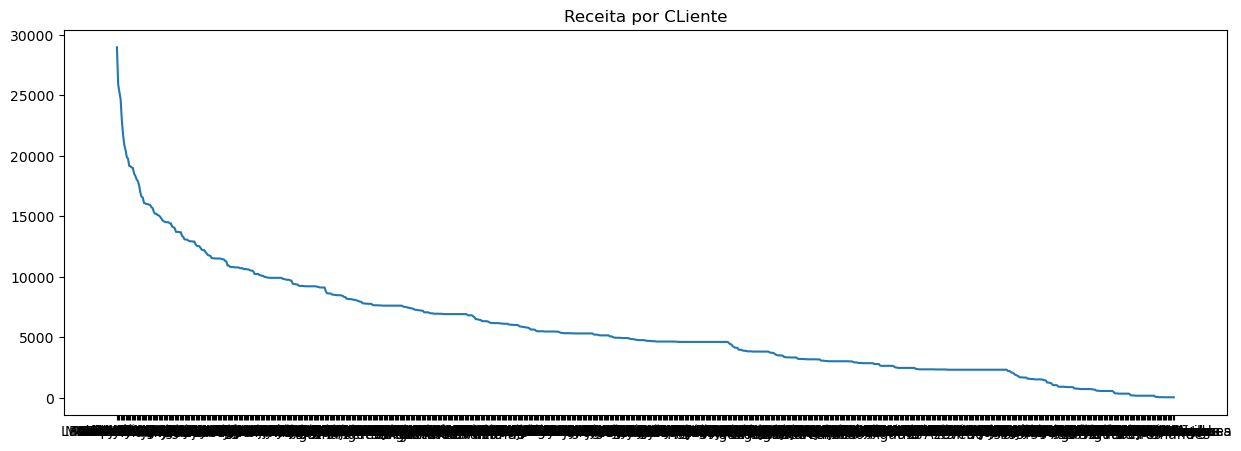

In [53]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Receita por CLiente')
plt.show()          

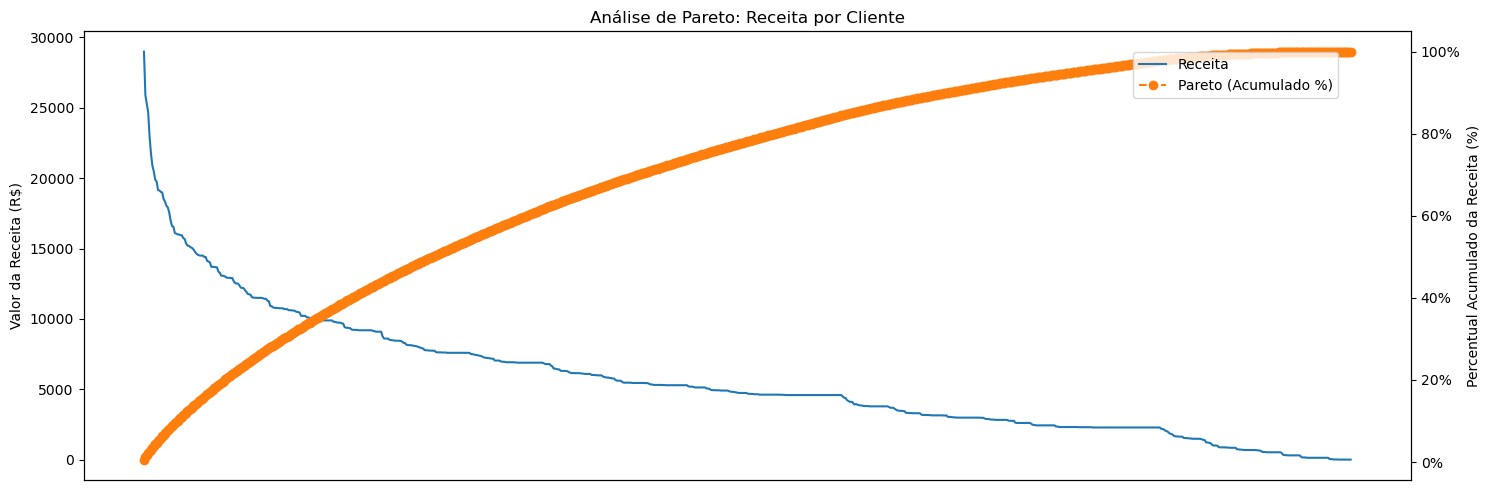

In [54]:
from matplotlib.ticker import PercentFormatter
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(graf_dados.index, graf_dados.values, color='C0', label='Receita')

ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum() / graf_dados.values.sum() * 100, color='C1', linestyle='--', marker='o', label='Pareto (Acumulado %)')
ax2.yaxis.set_major_formatter(PercentFormatter())

# Melhorias: Adicionar rótulos aos eixos para maior clareza
ax.set_ylabel('Valor da Receita (R$)')
ax2.set_ylabel('Percentual Acumulado da Receita (%)')
ax.set_xlabel('Cliente')
ax.tick_params(axis='x', rotation=45) # Rotaciona os nomes no eixo X para não sobrepor
ax2.axes.get_xaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)

plt.title('Análise de Pareto: Receita por Cliente')
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9)) # Adiciona uma legenda
plt.tight_layout() # Ajusta o layout para tudo caber bem
plt.show()

In [55]:
receita_acumulada = graf_dados.cumsum()/graf_dados.sum()
receita_acumulada[receita_acumulada < 0.60].count()/receita_acumulada.count()

np.float64(0.3170731707317073)

## Receita combinando produto-loja

In [56]:
graf_dados = df.groupby(['loja_cidade', 'produto_produto'])['produto_valor'].sum().reset_index()


graf_dados = graf_dados.rename(columns={
    'loja_cidade': 'loja',
    'produto_produto': 'produto',
    'produto_valor': 'receita'
})
graf_dados

,loja,produto,receita
0,Belo Horizonte,cadeira,6480.0000
1,Belo Horizonte,carregador,1800.0000
2,Belo Horizonte,impressora,11200.0000
3,Belo Horizonte,laptop básico,232300.0000
4,Belo Horizonte,laptop gamer,84800.0000
...,...,...,...
95,Vitória,mesa,12040.0000
96,Vitória,monitor,19500.0000
97,Vitória,mouse,320.0000
98,Vitória,teclado,360.0000


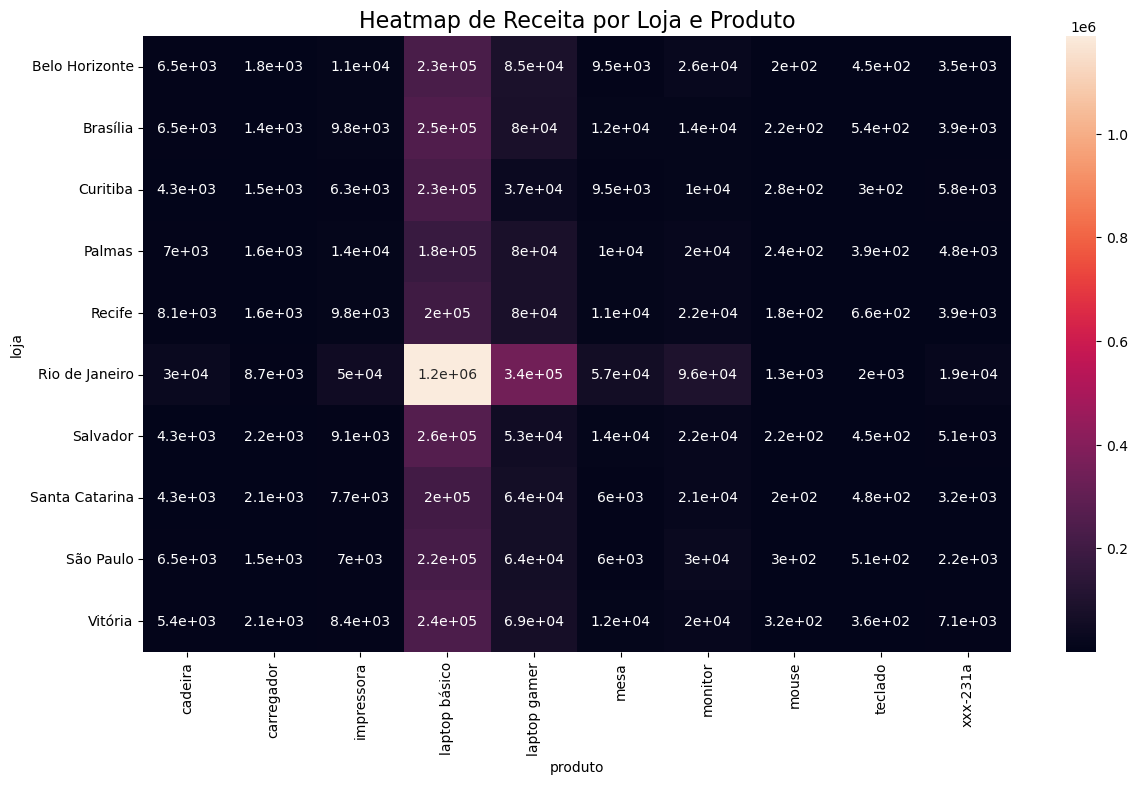

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
heatmap_data = graf_dados.pivot_table(index='loja', columns='produto', values='receita', aggfunc='sum')

plt.figure(figsize=(14, 8)) 
sns.heatmap(
    heatmap_data, 
    annot=True,        
)
plt.title('Heatmap de Receita por Loja e Produto', fontsize=16)
plt.show()

In [58]:
graf_dados = df.groupby(['loja_cidade', 'produto_produto'])['produto_valor'].sum().reset_index()


graf_dados = graf_dados.rename(columns={
    'loja_cidade': 'loja',
    'produto_produto': 'produto',
    'produto_valor': 'receita'
})
graf_dados = graf_dados.sort_values(by='receita', ascending=False)
graf_dados

,loja,produto,receita
53,Rio de Janeiro,laptop básico,1189100.0
54,Rio de Janeiro,laptop gamer,344500.0
63,Salvador,laptop básico,264500.0
13,Brasília,laptop básico,250700.0
93,Vitória,laptop básico,241500.0
...,...,...,...
17,Brasília,mouse,220.0
67,Salvador,mouse,220.0
7,Belo Horizonte,mouse,200.0
77,Santa Catarina,mouse,200.0


In [59]:
graf_dados['lojaprod'] = graf_dados.loja +'-' + graf_dados.produto
graf_dados

,loja,produto,receita,lojaprod
53,Rio de Janeiro,laptop básico,1189100.0,Rio de Janeiro-laptop básico
54,Rio de Janeiro,laptop gamer,344500.0,Rio de Janeiro-laptop gamer
63,Salvador,laptop básico,264500.0,Salvador-laptop básico
13,Brasília,laptop básico,250700.0,Brasília-laptop básico
93,Vitória,laptop básico,241500.0,Vitória-laptop básico
...,...,...,...,...
17,Brasília,mouse,220.0,Brasília-mouse
67,Salvador,mouse,220.0,Salvador-mouse
7,Belo Horizonte,mouse,200.0,Belo Horizonte-mouse
77,Santa Catarina,mouse,200.0,Santa Catarina-mouse


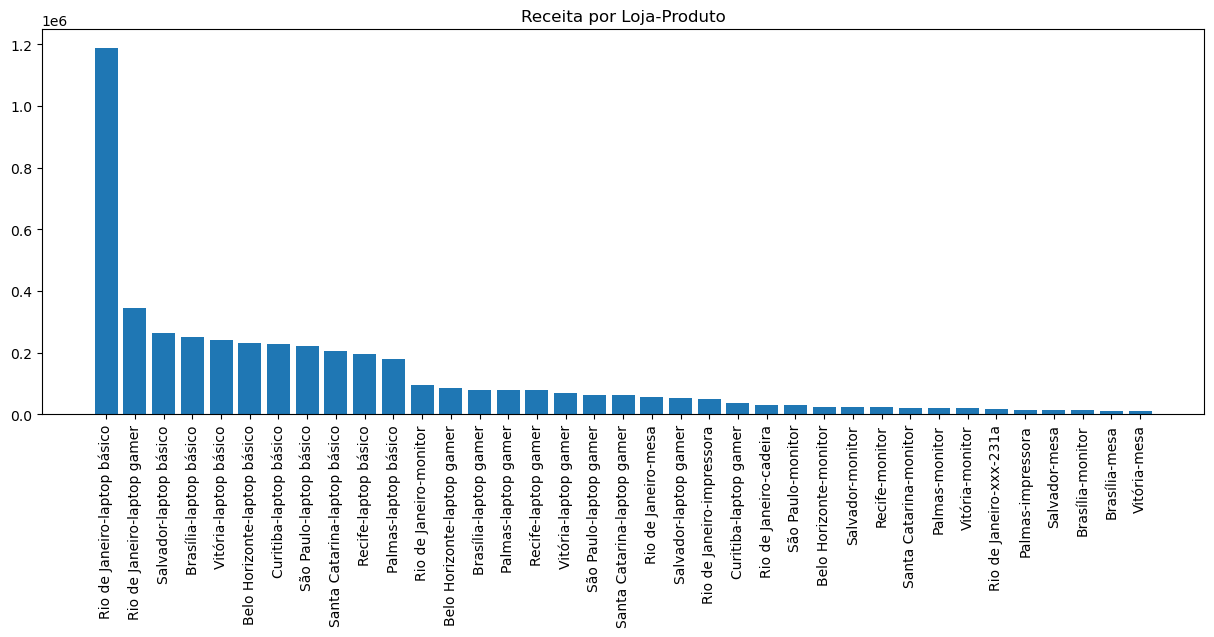

In [60]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.receita>0.01*graf_dados.receita.max()], graf_dados.receita[graf_dados.receita>0.01*graf_dados.receita.max()])
plt.xticks(rotation=90)
plt.title('Receita por Loja-Produto')
plt.show()

# Análise de tempo

## Tempo médio de pagamento

In [61]:
df.tempo_pg.mean()

np.float64(22.47200772200772)

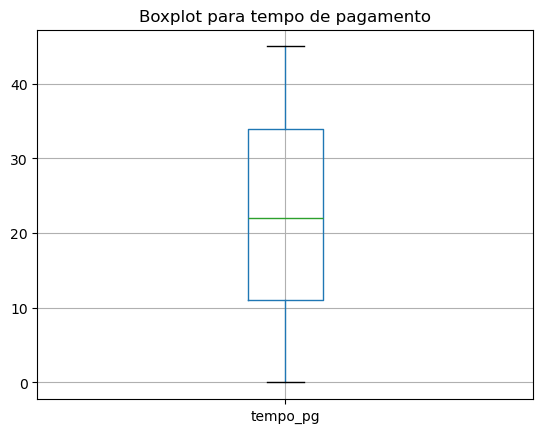

In [62]:
df.boxplot('tempo_pg')
plt.title('Boxplot para tempo de pagamento')
plt.show()

## Tempo de Pagamento por cidade e produto

In [63]:
df['tempo_pg'] = pd.to_numeric(df['tempo_pg'], errors='coerce')
df.groupby('loja_cidade')['tempo_pg'].mean()


loja_cidade
Belo Horizonte    21.430939
Brasília          22.269430
Curitiba          23.550898
Palmas            23.294444
Recife            22.301075
Rio de Janeiro    23.363855
Salvador          21.644860
Santa Catarina    19.769231
São Paulo         23.087432
Vitória           22.710660
Name: tempo_pg, dtype: float64

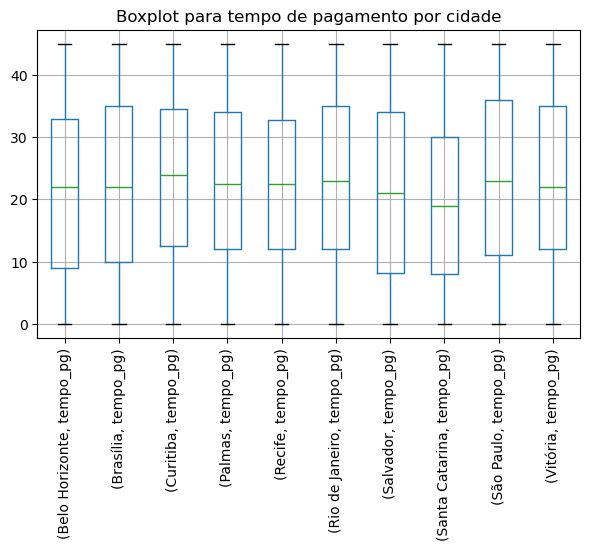

In [64]:
plt.figure(figsize=(7,4))
df[['loja_cidade', 'tempo_pg']].groupby('loja_cidade').boxplot('tempo_pag')
plt.title('Boxplot para tempo de pagamento por cidade')
plt.xticks(rotation=90)
plt.show()

In [65]:
df.groupby('produto_produto').tempo_pg.mean()

produto_produto
cadeira          23.734513
carregador       22.051724
impressora       21.383459
laptop básico    22.980513
laptop gamer     21.763889
mesa             20.300885
monitor          22.021277
mouse            22.912698
teclado          22.104575
xxx-231a         21.823077
Name: tempo_pg, dtype: float64

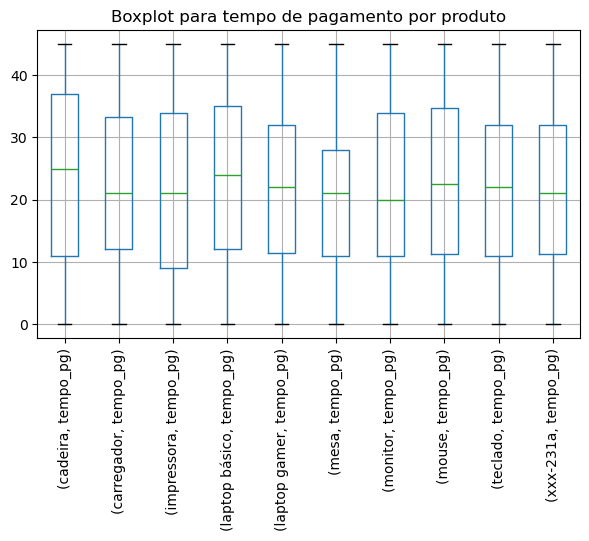

In [66]:
plt.figure(figsize=(7,4))
df[['produto_produto', 'tempo_pg']].groupby('produto_produto').boxplot('tempo_pag')
plt.title('Boxplot para tempo de pagamento por produto')
plt.xticks(rotation=90)
plt.show()

## Sazonalidade

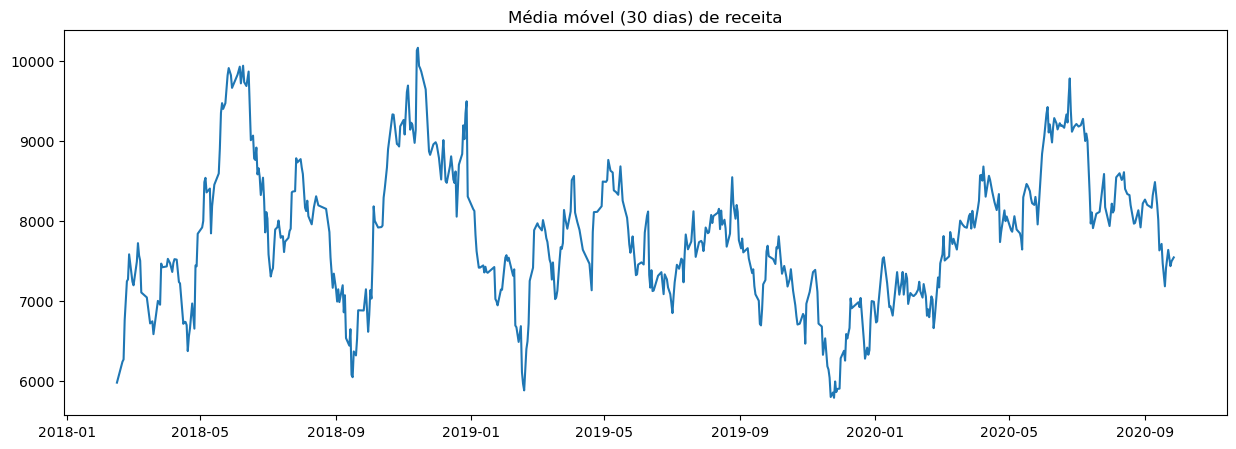

In [67]:
plt.figure(figsize=(15,5))
graf_dados = df[['produto_valor','dt_venda']].groupby('dt_venda').sum().rolling(30).mean()
plt.plot(graf_dados.index, graf_dados.values)
plt.title('Média móvel (30 dias) de receita')
plt.show()

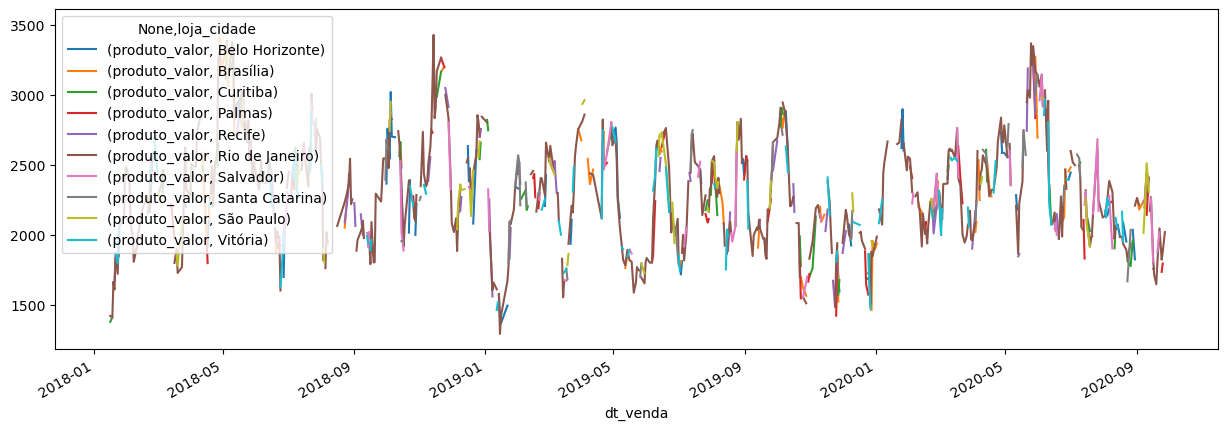

In [68]:
#plotar media movel da receita por cidade
fig, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor', 'loja_cidade', 'dt_venda']].groupby(['dt_venda','loja_cidade']).sum().rolling(30).mean().unstack().plot(ax=ax)
plt.show()

In [69]:
# criando uma nova coluna contendo o ano da venda
df['venda_ano'] = pd.DatetimeIndex(df.dt_venda).year

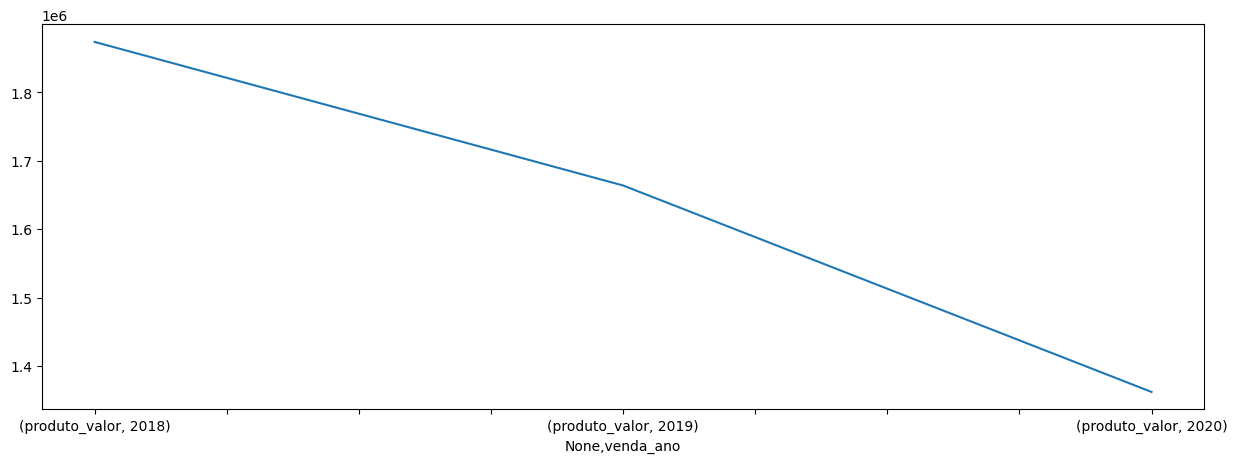

In [70]:
# tendencia de receita por ano
fif, ax = plt.subplots(figsize=(15,5))
graf_dados = df[['produto_valor', 'venda_ano']].groupby(['venda_ano']).sum().unstack().plot(ax=ax)
plt.show()

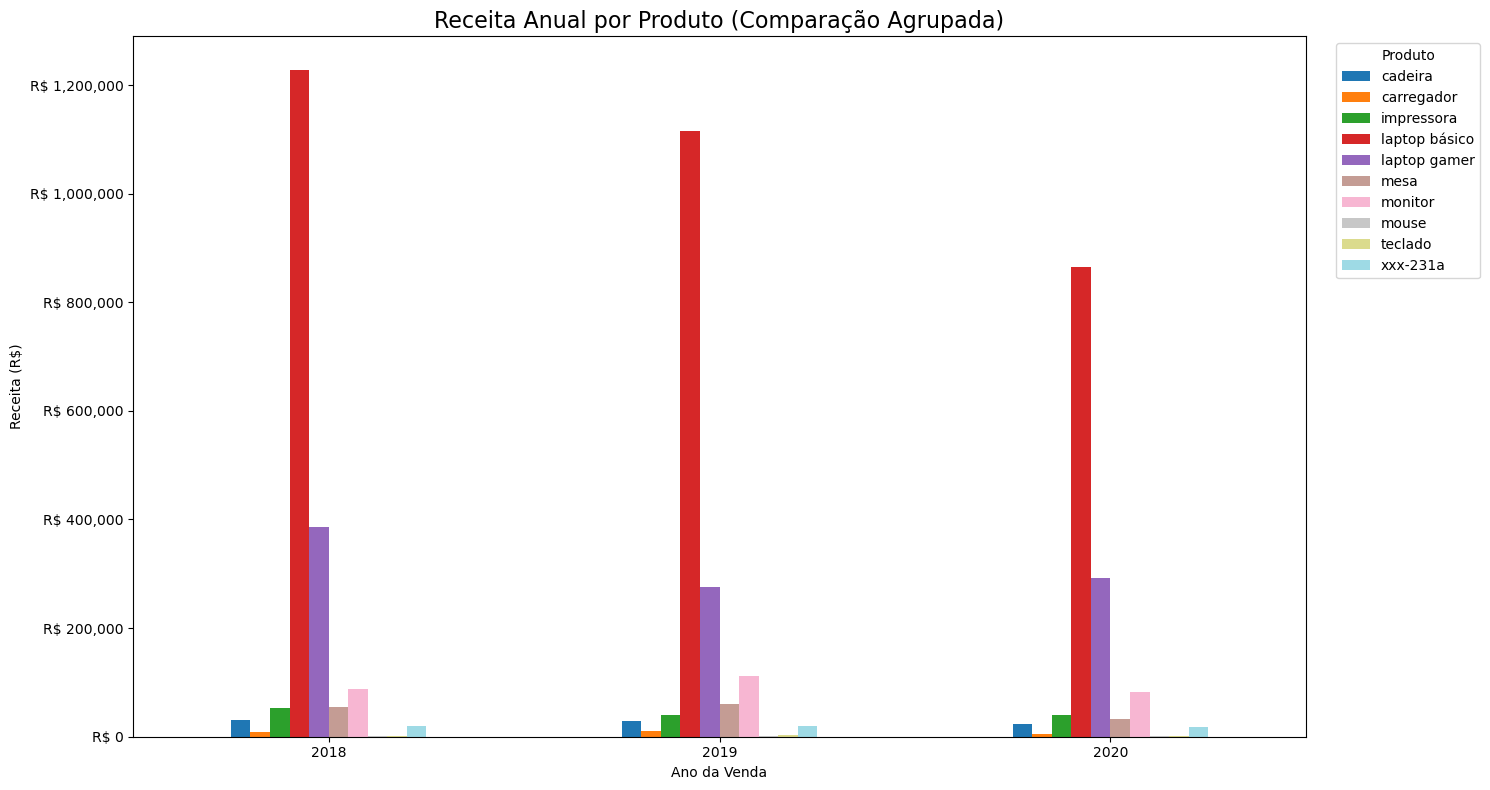

In [71]:
# Importar a formatação de eixo
from matplotlib.ticker import FuncFormatter

# --- Preparação dos Dados (a mesma de antes) ---
# Agrupe primeiro, depois selecione a coluna para a soma.
graf_dados = df.groupby(['venda_ano', 'produto_produto'])['produto_valor'].sum().unstack()

# --- Criação da Visualização ---
fig, ax = plt.subplots(figsize=(15, 8))

# Crie o gráfico de barras AGRUPADAS
graf_dados.plot(
    kind='bar',      # Tipo de gráfico
    # stacked=True,  <-- REMOVA OU COMENTE ESTA LINHA
    ax=ax,           # Eixo onde desenhar
    colormap='tab20' # Um mapa de cores com mais variedade para barras lado a lado
)

# --- Melhorias e Customização ---
ax.set_title('Receita Anual por Produto (Comparação Agrupada)', fontsize=16)
ax.set_ylabel('Receita (R$)')
ax.set_xlabel('Ano da Venda')

# Formatar o eixo Y para não usar notação científica
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))

# Rotacionar os rótulos do eixo X para ficarem legíveis
plt.xticks(rotation=0)

# Mover a legenda para um lugar melhor
ax.legend(title='Produto', bbox_to_anchor=(1.02, 1), loc='upper left')

# Ajustar o layout para a legenda caber
plt.tight_layout()
plt.show()

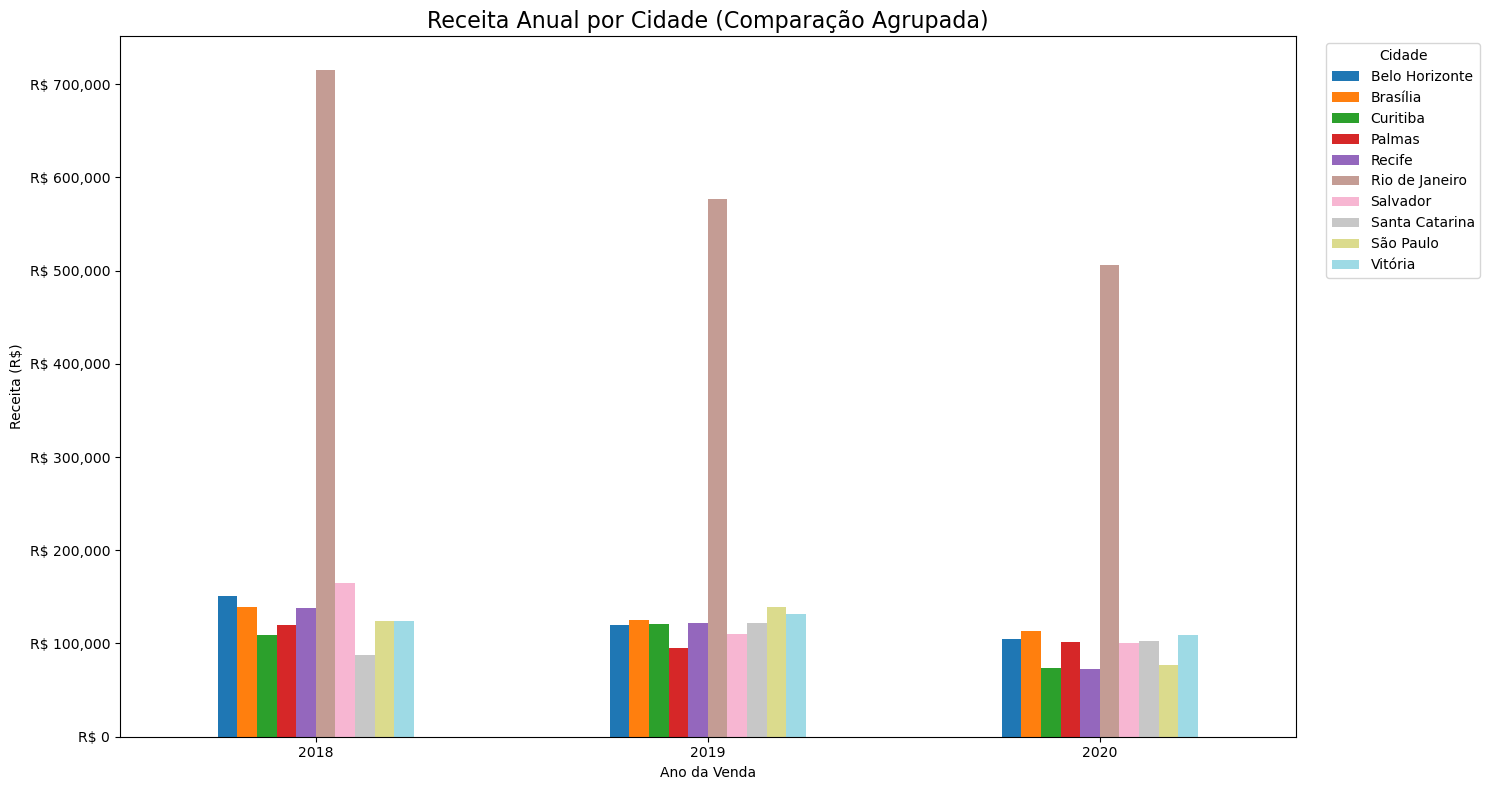

In [72]:
graf_dados = df.groupby(['venda_ano', 'loja_cidade'])['produto_valor'].sum().unstack()
fig, ax = plt.subplots(figsize=(15, 8))

# Crie o gráfico de barras AGRUPADAS
graf_dados.plot(
    kind='bar',
    ax=ax,
    colormap='tab20' # Um bom mapa de cores para dados categóricos
)

# --- Melhorias e Customização ---
ax.set_title('Receita Anual por Cidade (Comparação Agrupada)', fontsize=16)
ax.set_ylabel('Receita (R$)')
ax.set_xlabel('Ano da Venda')

# Formatar o eixo Y para não usar notação científica
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))

# Rotacionar os rótulos do eixo X
plt.xticks(rotation=0)

# Mover e corrigir a legenda
ax.legend(title='Cidade', bbox_to_anchor=(1.02, 1), loc='upper left')

# Ajustar o layout
plt.tight_layout()
plt.show()

# Tempo médio de pagamento por promoção

In [73]:
# Lendo arquivo csv
dfpromo= pd.read_csv('caso_estudo_venda_promocao.csv' , sep=";")
#definir index
dfpromo = dfpromo.set_index('id_venda')
#join entre df e dfpromo
df = df.join(dfpromo)
df

,id_cliente,id_loja,id_produto,dt_venda,Cliente_nome,Cliente_sexo,Cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,Pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,75,2018,0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,53,2018,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,63,2018,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,83,2018,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,84,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,25,2020,0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,31,2020,0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,39,2020,0


# Análise de inadimplência

## inadimplência por Loja

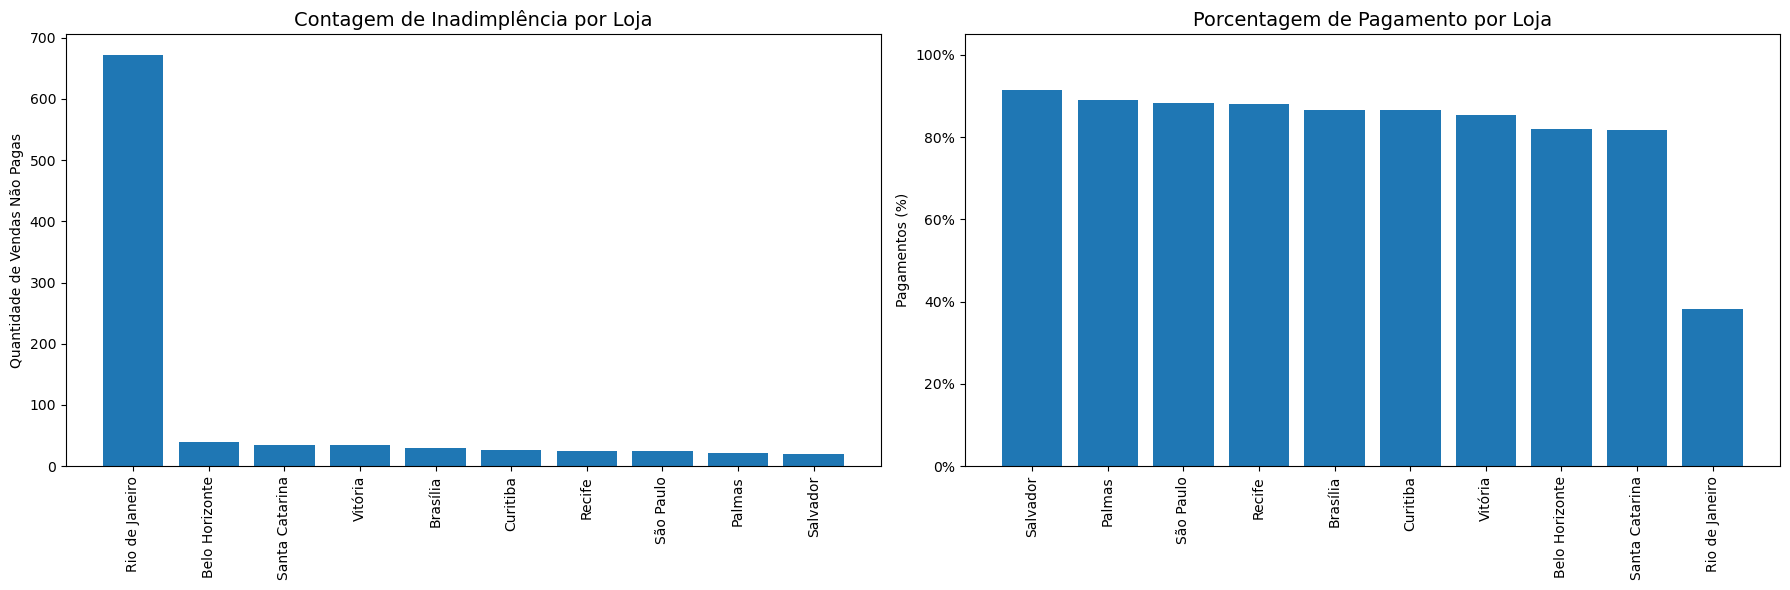

In [74]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter # Importa o formatador de porcentagem

inadimplencia_dados = df[df.Pg==0].groupby('loja_cidade')['produto_valor'].count().sort_values(ascending=False)

# Dados para o Gráfico 2: Porcentagem de Pagamento por Loja
# Primeiro, contamos o status de pagamento (0 e 1) para cada loja
pagamento_status = df.groupby('loja_cidade')['Pg'].value_counts().unstack(fill_value=0)
# Agora, calculamos a porcentagem de pagamento (coluna 1)
pagamento_porc = (pagamento_status[1] / (pagamento_status[0] + pagamento_status[1])) * 100
# Ordenamos os dados para o gráfico
pagamento_porc = pagamento_porc.sort_values(ascending=False)

# --- 2. Criação das Visualizações ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6)) # Aumenta a largura total

# --- Gráfico 1: Inadimplência por Loja ---
axes[0].bar(inadimplencia_dados.index, inadimplencia_dados.values)
axes[0].set_title('Contagem de Inadimplência por Loja', fontsize=14)
axes[0].set_ylabel('Quantidade de Vendas Não Pagas')
axes[0].tick_params(axis='x', rotation=90) # Rotaciona os nomes das cidades

# --- Gráfico 2: Porcentagem de Pagamento por Loja ---
axes[1].bar(pagamento_porc.index, pagamento_porc.values)
axes[1].set_title('Porcentagem de Pagamento por Loja', fontsize=14)
axes[1].set_ylabel('Pagamentos (%)')
# Formata o eixo Y para mostrar o símbolo de porcentagem '%'
axes[1].yaxis.set_major_formatter(PercentFormatter())
axes[1].set_ylim(0, 105) # Define o limite do eixo Y de 0 a 105%
axes[1].tick_params(axis='x', rotation=90) # Rotaciona os nomes das cidades

# Ajusta o layout para evitar sobreposição de títulos
plt.tight_layout()
plt.show()

## Inadimplência por Produto

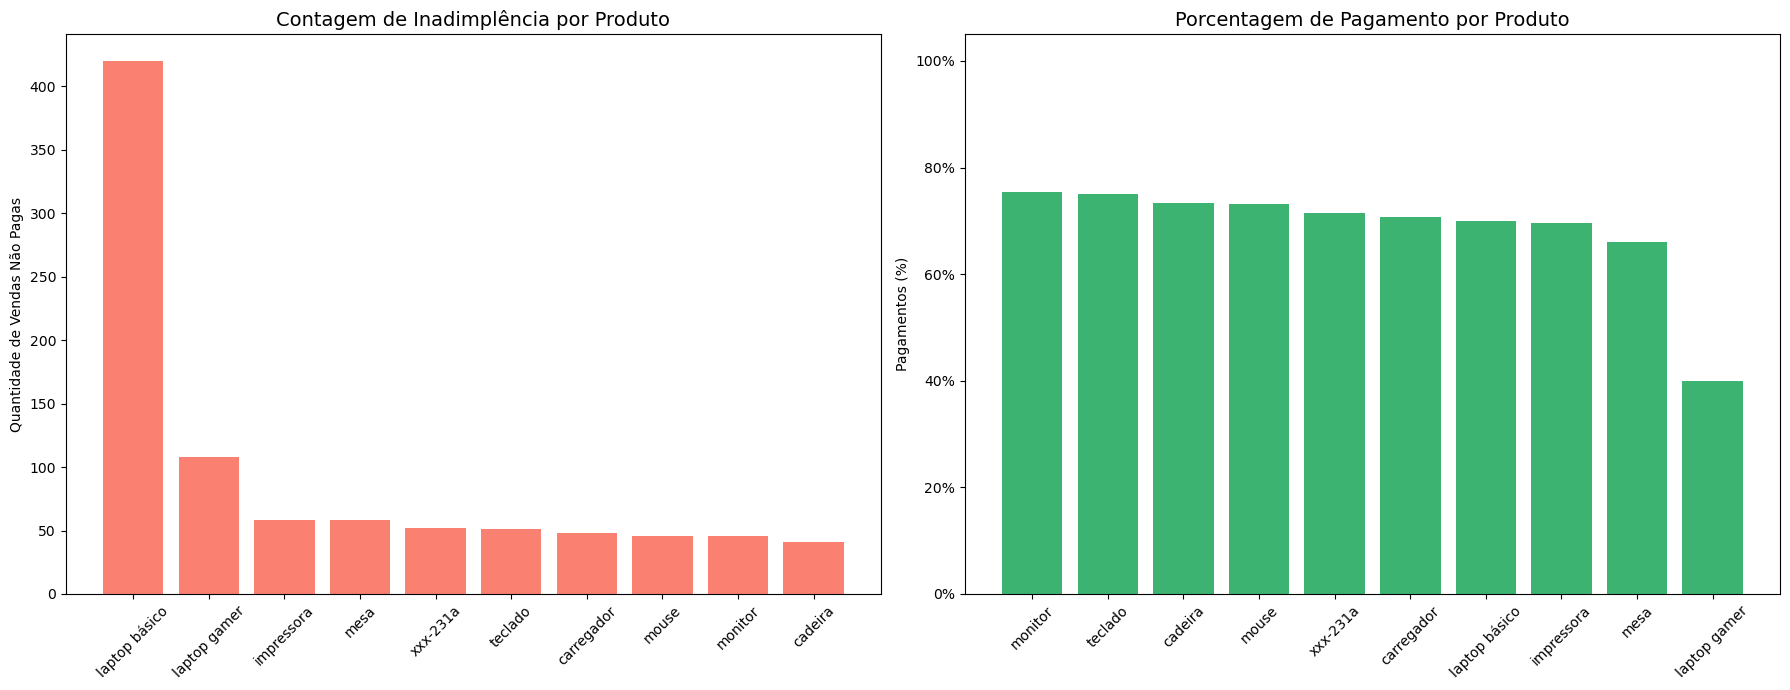

In [75]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


inadimplencia_dados = df[df.Pg==0].groupby('produto_produto')['produto_valor'].count().sort_values(ascending=False)
pagamento_status = df.groupby('produto_produto')['Pg'].value_counts().unstack(fill_value=0)
pagamento_porc = (pagamento_status[1] / (pagamento_status[0] + pagamento_status[1])) * 100
pagamento_porc = pagamento_porc.sort_values(ascending=False)


# --- 2. Criação das Visualizações ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# --- Gráfico 1: Inadimplência por Produto ---
axes[0].bar(inadimplencia_dados.index, inadimplencia_dados.values, color='salmon')
axes[0].set_title('Contagem de Inadimplência por Produto', fontsize=14)
axes[0].set_ylabel('Quantidade de Vendas Não Pagas')

# A forma mais limpa de rotacionar
axes[0].tick_params(axis='x', labelrotation=45)


# --- Gráfico 2: Porcentagem de Pagamento por Produto ---
axes[1].bar(pagamento_porc.index, pagamento_porc.values, color='mediumseagreen')
axes[1].set_title('Porcentagem de Pagamento por Produto', fontsize=14)
axes[1].set_ylabel('Pagamentos (%)')
axes[1].yaxis.set_major_formatter(PercentFormatter())
axes[1].set_ylim(0, 105)

#  A forma mais limpa de rotacionar
axes[1].tick_params(axis='x', labelrotation=45)


# --- 3. Finalização ---
plt.tight_layout()
plt.show()

## Inadimplência por Pagamento

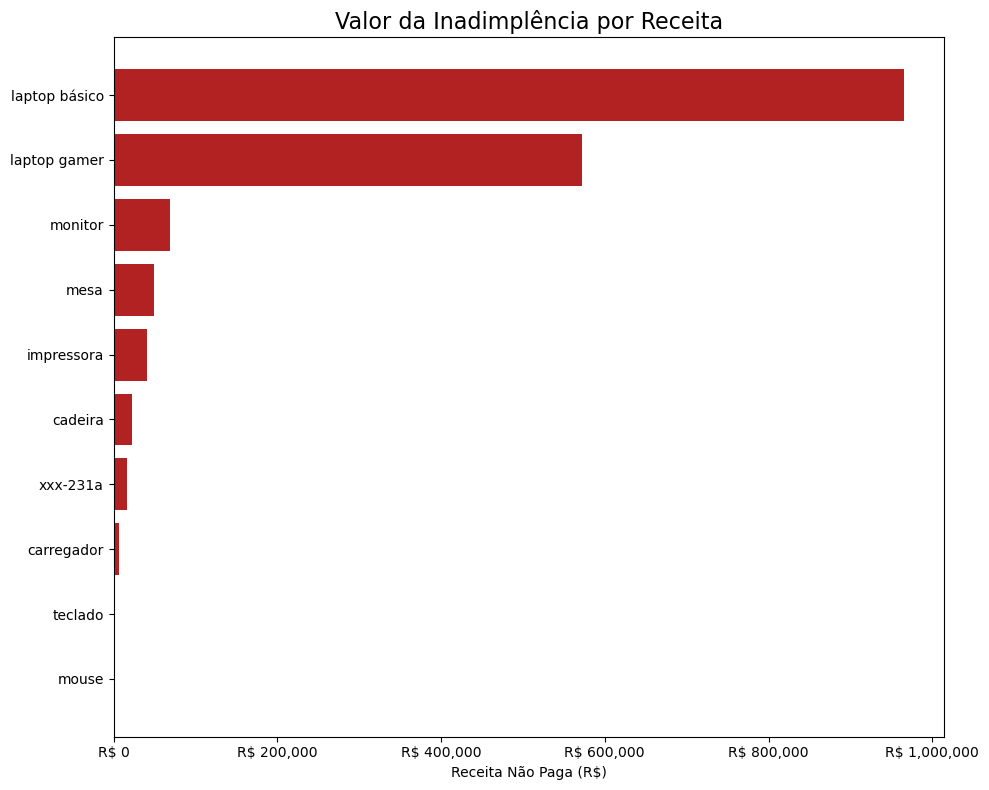

In [76]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# --- 1. Preparação dos Dados ---
# 1. Filtra apenas as vendas não pagas (Pg == 0)
# 2. Agrupa por produto
# 3. Seleciona a coluna de valor ('produto_valor')
# 4. SOMA (.sum()) os valores para cada produto
# 5. Ordena do maior para o menor
inadimplencia_receita_produto = df[df.Pg == 0].groupby('produto_produto')['produto_valor'].sum().sort_values(ascending=False)

# --- 2. Criação da Visualização ---
# Usar um gráfico de barras horizontais (barh) é melhor para nomes de produtos longos
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(inadimplencia_receita_produto.index, inadimplencia_receita_produto.values, color='firebrick')

# --- 3. Customização ---
ax.set_title('Valor da Inadimplência por Receita', fontsize=16)
ax.set_xlabel('Receita Não Paga (R$)')
# Inverte o eixo para o produto com maior prejuízo ficar no topo
ax.invert_yaxis() 

# Formata o eixo X para mostrar valores monetários de forma legível
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'R$ {x:,.0f}'))

plt.tight_layout()
plt.show()

In [77]:
# Re-calcule os dados do gráfico (se ainda não tiver a variável pronta)
inadimplencia_receita_produto = df[df.Pg == 0].groupby('produto_produto')['produto_valor'].sum().sort_values(ascending=False)

# Agora, imprima os valores exatos
print("Valor exato da inadimplência por produto:")
print(inadimplencia_receita_produto)

Valor exato da inadimplência por produto:
produto_produto
laptop básico    966000.0000
laptop gamer     572400.0000
monitor           69000.0000
mesa              49880.0000
impressora        40600.0000
cadeira           22140.0000
xxx-231a          16699.0304
carregador         7200.0000
teclado            1530.0000
mouse               920.0000
Name: produto_valor, dtype: float64


# Laptop básico' tem o maior prejuízo porque vende muito mais que os outros, ou porque as poucas vendas que não são pagas têm um valor muito alto??


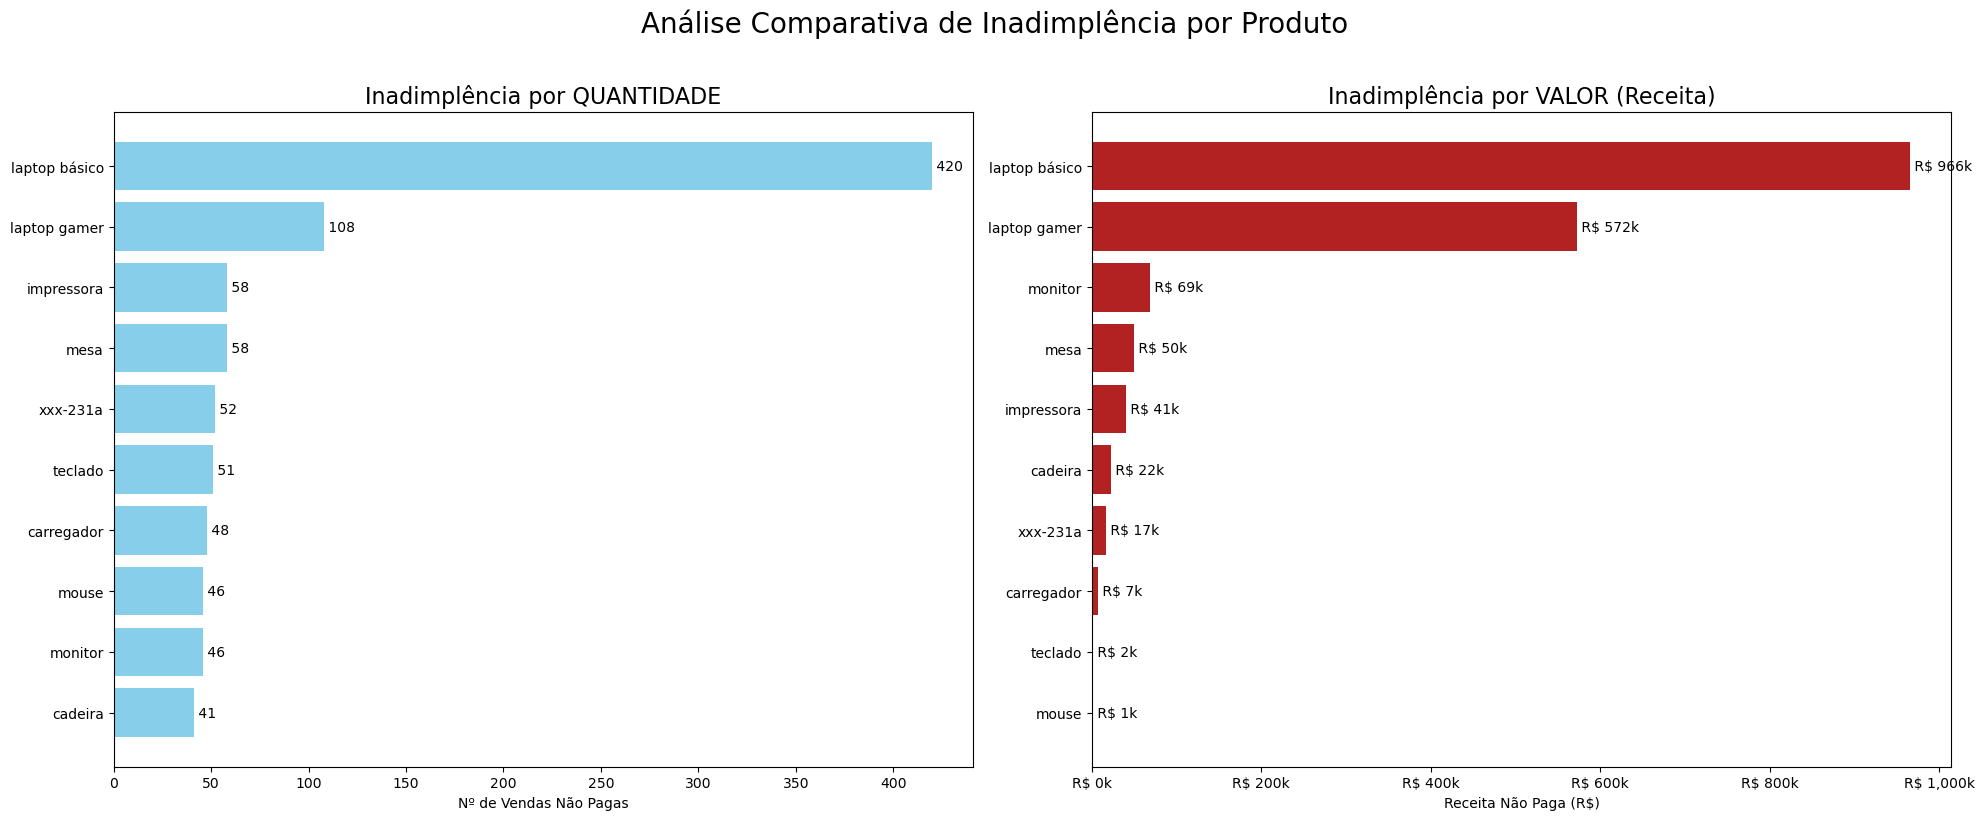


Tabela Comparativa de Inadimplência (Contagem vs. Receita):
                 contagem      receita
produto_produto                       
laptop básico         420  966000.0000
laptop gamer          108  572400.0000
monitor                46   69000.0000
mesa                   58   49880.0000
impressora             58   40600.0000
cadeira                41   22140.0000
xxx-231a               52   16699.0304
carregador             48    7200.0000
teclado                51    1530.0000
mouse                  46     920.0000


In [78]:
inadimplencia_contagem = df[df.Pg == 0].groupby('produto_produto')['produto_valor'].count().sort_values(ascending=False)

# DADO B: Valor da Inadimplência por Produto (RECEITA)
inadimplencia_receita = df[df.Pg == 0].groupby('produto_produto')['produto_valor'].sum().sort_values(ascending=False)


# --- 2. Criação da Visualização Comparativa ---

# Cria a figura com dois subplots (um ao lado do outro)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8)) # Figura mais larga para caber tudo

# --- Gráfico da Esquerda: Análise por QUANTIDADE ---
axes[0].barh(inadimplencia_contagem.index, inadimplencia_contagem.values, color='skyblue')
axes[0].set_title('Inadimplência por QUANTIDADE', fontsize=16)
axes[0].set_xlabel('Nº de Vendas Não Pagas')
axes[0].invert_yaxis() # Inverte para o maior ficar no topo

# Adiciona os valores exatos nas barras para facilitar a leitura
for index, value in enumerate(inadimplencia_contagem):
    axes[0].text(value, index, f' {int(value)}', va='center')


# --- Gráfico da Direita: Análise por VALOR (RECEITA) ---
axes[1].barh(inadimplencia_receita.index, inadimplencia_receita.values, color='firebrick')
axes[1].set_title('Inadimplência por VALOR (Receita)', fontsize=16)
axes[1].set_xlabel('Receita Não Paga (R$)')
axes[1].invert_yaxis()

# Formata o eixo X para mostrar valores monetários de forma legível
axes[1].xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'R$ {x/1000:,.0f}k')) # Formata em milhares (ex: 200k)

# Adiciona os valores exatos nas barras
for index, value in enumerate(inadimplencia_receita):
    axes[1].text(value, index, f' R$ {value/1000:,.0f}k', va='center')


# --- 3. Finalização ---
fig.suptitle('Análise Comparativa de Inadimplência por Produto', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

# --- 4. Análise Numérica (opcional, mas muito útil) ---
# Cria um DataFrame para comparar os rankings lado a lado
analise_comparativa = pd.DataFrame({
    'contagem': inadimplencia_contagem,
    'receita': inadimplencia_receita
}).sort_values(by='receita', ascending=False)

print("\nTabela Comparativa de Inadimplência (Contagem vs. Receita):")
print(analise_comparativa)

## Conclusão: "O 'laptop básico' é nosso maior problema de inadimplência em todos os sentidos. Ele não só tem o maior número de vendas não pagas (volume), mas também representa a maior perda financeira (valor). Ações para mitigar o risco neste produto são de altíssima prioridade."

## Inadimplência por Idade

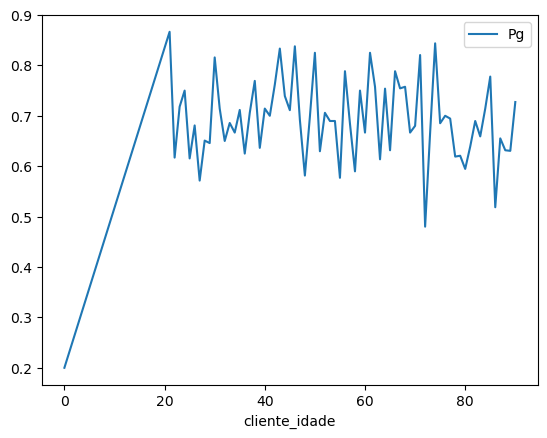

In [79]:
graf_dados = df[['cliente_idade','Pg']].groupby('cliente_idade').mean().sort_values('cliente_idade')
graf_dados.plot()
plt.show()

In [80]:
df[df.cliente_idade<1]

,id_cliente,id_loja,id_produto,dt_venda,Cliente_nome,Cliente_sexo,Cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,Pg,tempo_pg,cliente_idade,venda_ano,promoção
id,,,,,,,,,,,,,,,,
21,270,2,10,2018-01-12,Sem Nome,M,2025-01-01,Rio de Janeiro,xxx-231a,321.1352,NaT,0,NaN,0,2018,0
1059,269,5,4,2018-12-15,Sem Nome,F,2025-01-01,Santa Catarina,laptop gamer,5300.0000,NaT,0,NaN,0,2018,0
1745,269,9,3,2019-08-03,Sem Nome,F,2025-01-01,Palmas,laptop básico,2300.0000,2019-09-03,1,31.0,0,2019,1
1900,269,2,3,2019-09-22,Sem Nome,F,2025-01-01,Rio de Janeiro,laptop básico,2300.0000,NaT,0,NaN,0,2019,0
2370,277,10,3,2020-03-09,Brenda Santos,F,2025-01-01,Vitória,laptop básico,2300.0000,NaT,0,NaN,0,2020,0


# Mapa de calor de inadimplência 

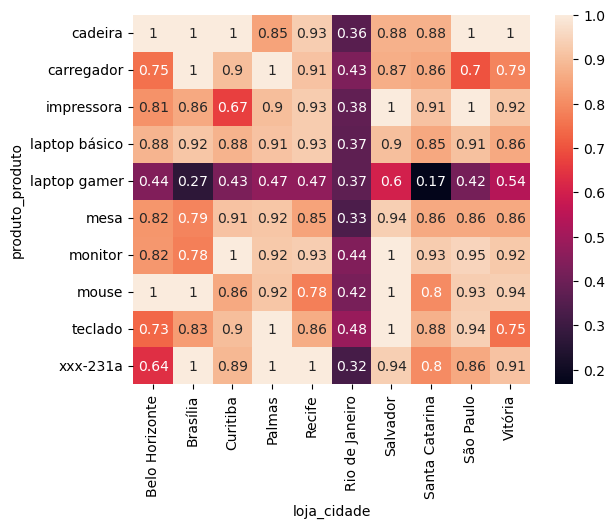

In [81]:
import seaborn as sns
graf_dados = df.pivot_table(index='produto_produto', columns= 'loja_cidade',  values='Pg', aggfunc='mean')
sns.heatmap(graf_dados, annot=True)
plt.show()

## Marchine Learning

## Alvo

In [82]:
dfML = df[['Cliente_sexo', 'loja_cidade', 'produto_produto', 'produto_valor', 'cliente_idade', 'promoção', 'Pg']]
dfML =dfML.replace([' ','_'], '_', regex=True)
dfML

,Cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,Pg
id,,,,,,,
1,M,Palmas,laptop_básico,2300.0,75,0,1
2,F,Palmas,laptop_básico,2300.0,53,1,1
3,M,Salvador,cadeira,540.0,63,1,1
4,M,Belo_Horizonte,laptop_básico,2300.0,83,0,0
5,M,Palmas,mouse,20.0,84,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,150.0,25,0,1
2997,F,Brasília,laptop_básico,2300.0,31,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,5300.0,39,0,0


## Normalização

In [83]:
dfML['produto_valor'] = dfML['produto_valor']/dfML['produto_valor'].max()
dfML['cliente_idade'] = dfML['cliente_idade']/dfML['cliente_idade'].max()
dfML

,Cliente_sexo,loja_cidade,produto_produto,produto_valor,cliente_idade,promoção,Pg
id,,,,,,,
1,M,Palmas,laptop_básico,0.433962,0.833333,0,1
2,F,Palmas,laptop_básico,0.433962,0.588889,1,1
3,M,Salvador,cadeira,0.101887,0.700000,1,1
4,M,Belo_Horizonte,laptop_básico,0.433962,0.922222,0,0
5,M,Palmas,mouse,0.003774,0.933333,0,1
...,...,...,...,...,...,...,...
2996,F,Curitiba,carregador,0.028302,0.277778,0,1
2997,F,Brasília,laptop_básico,0.433962,0.344444,0,1
2998,M,Rio_de_Janeiro,laptop_gamer,1.000000,0.433333,0,0


## Dados categóricos

In [84]:
col_cat = ['Cliente_sexo', 'loja_cidade', 'produto_produto', 'promoção']
dfML_dummies = pd.get_dummies(dfML[col_cat].astype(str), drop_first=False)

# Adicione esta linha para converter True/False para 1/0
dfML_dummies = dfML_dummies.astype(int)
dfML_dummies

,Cliente_sexo_F,Cliente_sexo_M,Cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,loja_cidade_Rio_de_Janeiro,loja_cidade_Salvador,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx-231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2997,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [85]:
dfML = pd.concat([dfML, dfML_dummies], axis=1)
dfML = dfML.drop(col_cat, axis=1)
dfML

,produto_valor,cliente_idade,Pg,Cliente_sexo_F,Cliente_sexo_M,Cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx-231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
1,0.433962,0.833333,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,0.433962,0.588889,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3,0.101887,0.700000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.433962,0.922222,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,0.003774,0.933333,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,0.028302,0.277778,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2997,0.433962,0.344444,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,1.000000,0.433333,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Dados de treinamento e de teste

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, auc

y= dfML.Pg
X = dfML.drop(['Pg'], axis=1)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

X_new = X.loc[[2997,2998]]
X_new

,produto_valor,cliente_idade,Cliente_sexo_F,Cliente_sexo_M,Cliente_sexo_O,loja_cidade_Belo_Horizonte,loja_cidade_Brasília,loja_cidade_Curitiba,loja_cidade_Palmas,loja_cidade_Recife,...,produto_produto_impressora,produto_produto_laptop_básico,produto_produto_laptop_gamer,produto_produto_mesa,produto_produto_monitor,produto_produto_mouse,produto_produto_teclado,produto_produto_xxx-231a,promoção_0,promoção_1
id,,,,,,,,,,,,,,,,,,,,,
2997,0.433962,0.344444,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2998,1.000000,0.433333,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Regressão Logística

In [87]:
# Adicione esta célula de limpeza ANTES do seu código de modelo

# 1. Armazenar o nome da coluna alvo ('Pg') para não modificá-la se precisar
target_col = 'Pg' 

# 2. Limpar todos os nomes de colunas
#    - Substitui espaços e hifens por underscore (_)
#    - Remove outros caracteres especiais
dfML.columns = [''.join(c if c.isalnum() else '_' for c in str(col)) for col in dfML.columns]

# 3. Garante que a coluna alvo não foi alterada (se o nome dela for simples)
#    Se o nome da sua coluna alvo também tiver caracteres especiais, você precisaria
#    ajustar a fórmula também. No seu caso, 'Pg' é um nome válido.

print("Novos nomes de colunas limpos:")
print(dfML.columns.tolist())

Novos nomes de colunas limpos:
['produto_valor', 'cliente_idade', 'Pg', 'Cliente_sexo_F', 'Cliente_sexo_M', 'Cliente_sexo_O', 'loja_cidade_Belo_Horizonte', 'loja_cidade_Brasília', 'loja_cidade_Curitiba', 'loja_cidade_Palmas', 'loja_cidade_Recife', 'loja_cidade_Rio_de_Janeiro', 'loja_cidade_Salvador', 'loja_cidade_Santa_Catarina', 'loja_cidade_São_Paulo', 'loja_cidade_Vitória', 'produto_produto_cadeira', 'produto_produto_carregador', 'produto_produto_impressora', 'produto_produto_laptop_básico', 'produto_produto_laptop_gamer', 'produto_produto_mesa', 'produto_produto_monitor', 'produto_produto_mouse', 'produto_produto_teclado', 'produto_produto_xxx_231a', 'promoção_0', 'promoção_1']


In [88]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# SUGESTÃO: Use o DataFrame ANTES de você ter aplicado o get_dummies.
# Se você não tem mais ele, vamos recriar um com as colunas originais que você mencionou.
# Supondo que o DataFrame original se chama 'df_original'.
# As colunas categóricas originais eram: ['Cliente_sexo', 'loja_cidade', 'produto_produto', 'promoção']
# As numéricas eram: ['produto_valor', 'cliente_idade']
# A alvo é: 'Pg'

# Construa a fórmula com os nomes das colunas originais.
# O 'C()' em volta das variáveis diz explicitamente ao patsy: "Trate esta variável como Categórica".
formula = 'Pg ~ C(Cliente_sexo) + C(loja_cidade) + C(produto_produto) + C(promoção) + produto_valor + cliente_idade'

# Agora, use um DataFrame que contenha apenas essas colunas no seu formato original.
# Vou chamar de 'df_para_modelo'. Você precisa criar este df a partir do seu df principal.
df_para_modelo = df[['Pg', 'Cliente_sexo', 'loja_cidade', 'produto_produto', 'promoção', 'produto_valor', 'cliente_idade']]


# Crie o modelo usando esta fórmula e o DataFrame simplificado
modelo = smf.glm(formula=formula, data=df_para_modelo,
                 family=sm.families.Binomial()).fit()

print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                     Pg   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2977
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.6
Date:                Mon, 08 Sep 2025   Deviance:                       2677.1
Time:                        10:51:01   Pearson chi2:                 3.01e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2916
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [89]:
from sklearn.linear_model import LogisticRegression
# Changed 'none' to None (Python object, not string) and fixed solver parameter
model = LogisticRegression(penalty=None, solver='newton-cg')
model.fit(X_train, y_train)

print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')  # Fixed newline character from /n to \n
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')  # Fixed newline character from /n to \n
print(classification_report(y_test, model.predict(X_test)))  # Fixed variable name from X_teste to X_test

- Matriz de Confusão
[[180 115]
 [ 76 529]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       928
           1       0.83      0.89      0.86      2072

    accuracy                           0.80      3000
   macro avg       0.77      0.75      0.76      3000
weighted avg       0.79      0.80      0.80      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.70      0.61      0.65       295
           1       0.82      0.87      0.85       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



## Árvore de Decisão

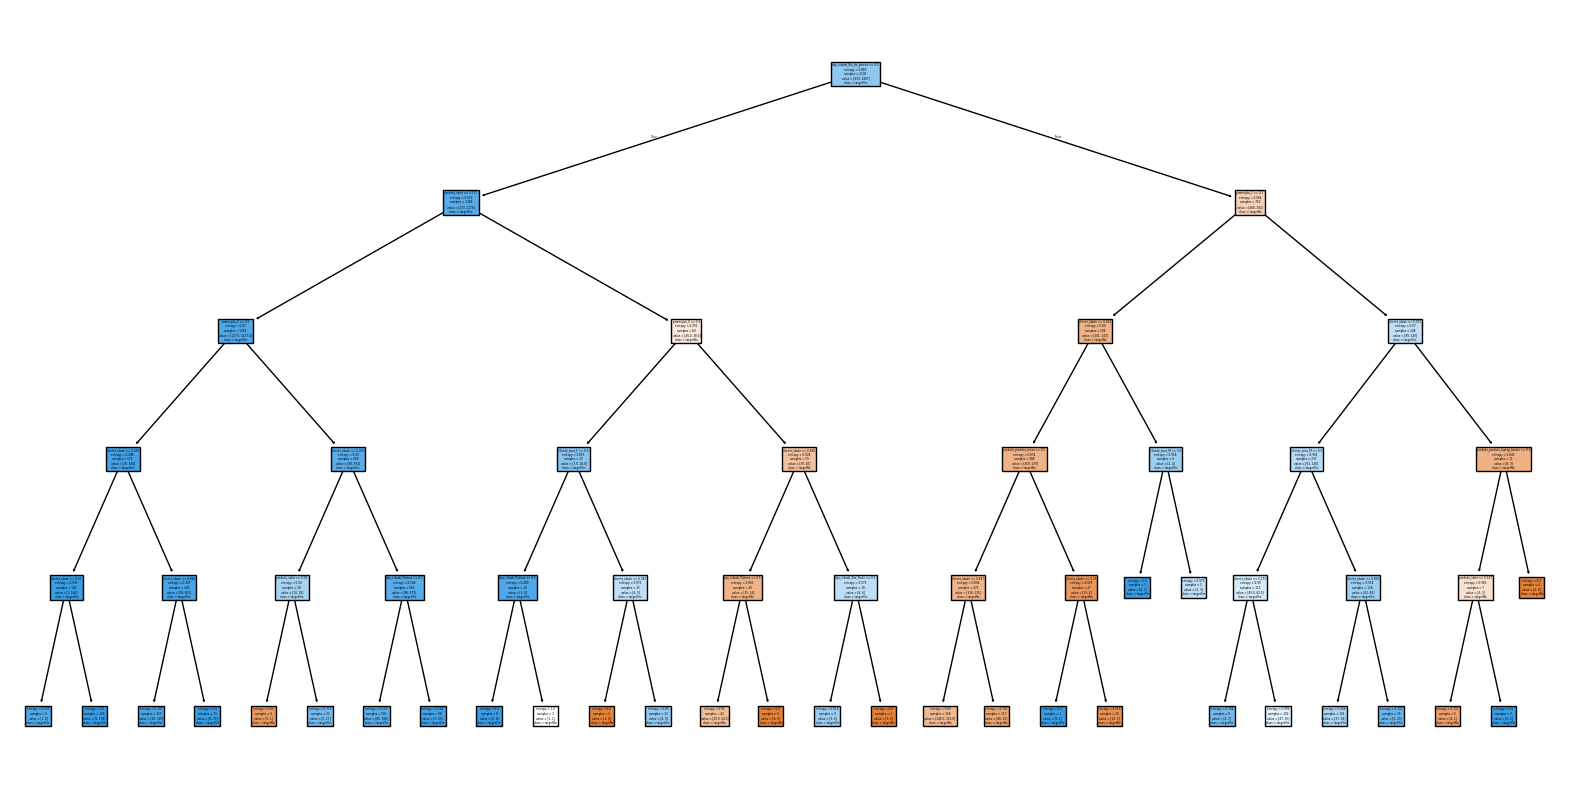

In [90]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics, tree

model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = model.fit(X_train, y_train)
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(model,
                   feature_names=X.columns,
                   class_names=['targetNo', 'targetYes'],
                   filled=True)
plt.show()

In [91]:
print('- Matriz de Confusão')
print(confusion_matrix(y_test, model.predict(X_test)))
print('\n- Reporte completo')  
print(classification_report(y, model.predict(X)))
print('\n- Reporte teste')  
print(classification_report(y_test, model.predict(X_test)))  #

- Matriz de Confusão
[[184 111]
 [ 82 523]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       928
           1       0.85      0.89      0.87      2072

    accuracy                           0.81      3000
   macro avg       0.78      0.76      0.77      3000
weighted avg       0.81      0.81      0.81      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.69      0.62      0.66       295
           1       0.82      0.86      0.84       605

    accuracy                           0.79       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.78      0.79      0.78       900



## Rede Neurais

In [93]:
# Importações necessárias do Keras e TensorFlow
from keras.models import Sequential
from keras.layers import Dense, Input # <--- IMPORTAR A CAMADA 'Input'
import keras
import tensorflow

# Define uma semente para garantir que os resultados sejam reproduzíveis
tensorflow.random.set_seed(2)

# --- CORREÇÃO AQUI ---
# Define o número de features (colunas) de entrada
n_features = len(X.columns)

# Cria um modelo sequencial
model = Sequential([
    # 1. Adiciona a camada de Input como a PRIMEIRA camada
    keras.Input(shape=(n_features,)), 
    
    # 2. A primeira camada Dense agora NÃO PRECISA mais do 'input_dim'
    Dense(15, activation='relu', kernel_initializer='random_normal'),
    
    # O resto das camadas continua igual
    Dense(7, activation='relu', kernel_initializer='random_normal'),
    Dense(3, activation='relu', kernel_initializer='random_normal'),
    Dense(3, activation='relu', kernel_initializer='random_normal'),
    Dense(1, activation='sigmoid', kernel_initializer='random_normal')
])

# Para verificar se a arquitetura está correta, você pode usar:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 15)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │              24 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 572 (2.23 KB)

 Trainable params: 572 (2.23 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
# Compila o modelo, definindo o otimizador, a função de perda e a métrica de avaliação
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treina o modelo com os dados de treinamento
model.fit(X_train, y_train, batch_size=128, epochs=300, verbose=False)

In [96]:
# Ele faz a previsão de probabilidade e depois arredonda para 0 ou 1.

y_pred_test = (model.predict(X_test) > 0.5).astype("int32")
y_pred_total = (model.predict(X) > 0.5).astype("int32")

# Imprime a Matriz de Confusão com os dados de teste
print('- Matriz de Confusão')
print(confusion_matrix(y_test, y_pred_test))

# Imprime o Relatório de Classificação com os dados completos
print('\n- Reporte completo')
print(classification_report(y, y_pred_total))

# Imprime o Relatório de Classificação com os dados de teste
print('\n- Reporte teste')
print(classification_report(y_test, y_pred_test))

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step
- Matriz de Confusão
[[192 103]
 [ 83 522]]

- Reporte completo
              precision    recall  f1-score   support

           0       0.70      0.66      0.68       928
           1       0.85      0.88      0.86      2072

    accuracy                           0.81      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.80      0.81      0.81      3000


- Reporte teste
              precision    recall  f1-score   support

           0       0.70      0.65      0.67       295
           1       0.84      0.86      0.85       605

    accuracy                           0.79       900
   macro avg       0.77      0.76      0.76       900
weighted avg       0.79      0.79      0.79       900



In [97]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[0.853158  ],
       [0.33222148]], dtype=float32)